In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
print df.shape
df.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
print df["sales"].unique()
print df["salary"].unique()

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df["left"].value_counts()[1]/float(df["left"].value_counts().sum())

0.2380825388359224

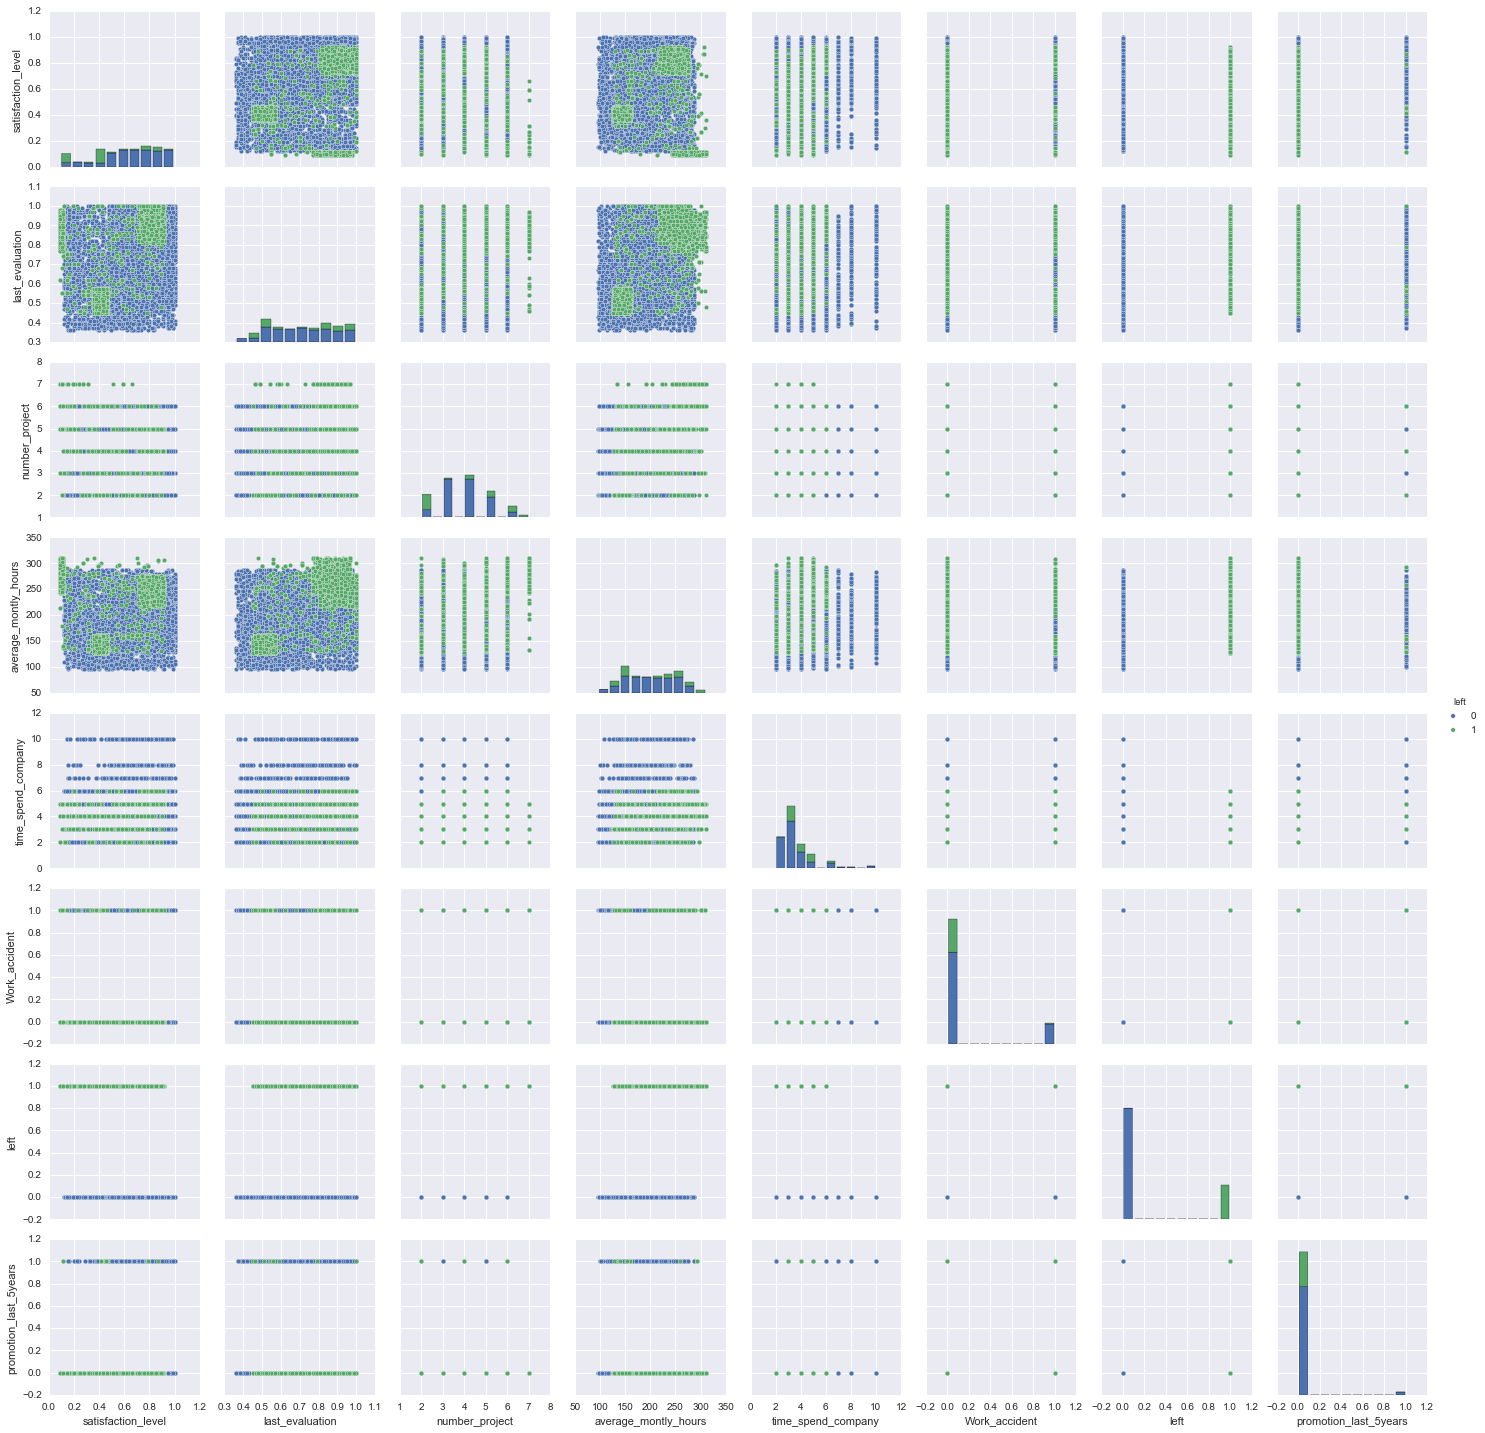

In [6]:
sns.pairplot(df,hue='left')

From this pairplot, we have following observations:
1. If the number of projects is too low(<=2), employees chances of leaving the company are high
2. If the number of projects is too high(>=5), employees chances of leaving the company are high
3. If monthly hours <140 or >200, employees chances of leaving are high
4. Work accidents dont seem to have any corelation with the employee leaving the company
5. employees chances of leaving the company are realtively high, when their number_years is between 3 and 5
6. IF the last evaluation is too good or too bad, employees tend to leave the company more.

From this it looks like tree based algorithms would work best on this problem than regression. Lets test!

In [7]:
df.groupby(["left","number_project"])["satisfaction_level"].count()

left  number_project
0     2                  821
      3                 3983
      4                 3956
      5                 2149
      6                  519
1     2                 1567
      3                   72
      4                  409
      5                  612
      6                  655
      7                  256
Name: satisfaction_level, dtype: int64

In [8]:
df.loc[df["number_project"] == 2,"Num_Project_cat"] = 0
df.loc[(df["number_project"] == 3) | (df["number_project"] == 4) | (df["number_project"] == 5),"Num_Project_cat"] = 1
df.loc[df["number_project"] > 4,"Num_Project_cat"] = 2
df.drop("number_project",axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,Num_Project_cat
0,0.38,0.53,2,157,3,0,1,0,sales,low,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,2.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0.0


In [9]:
df.columns

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'sales', u'salary',
       u'Num_Project_cat'],
      dtype='object')

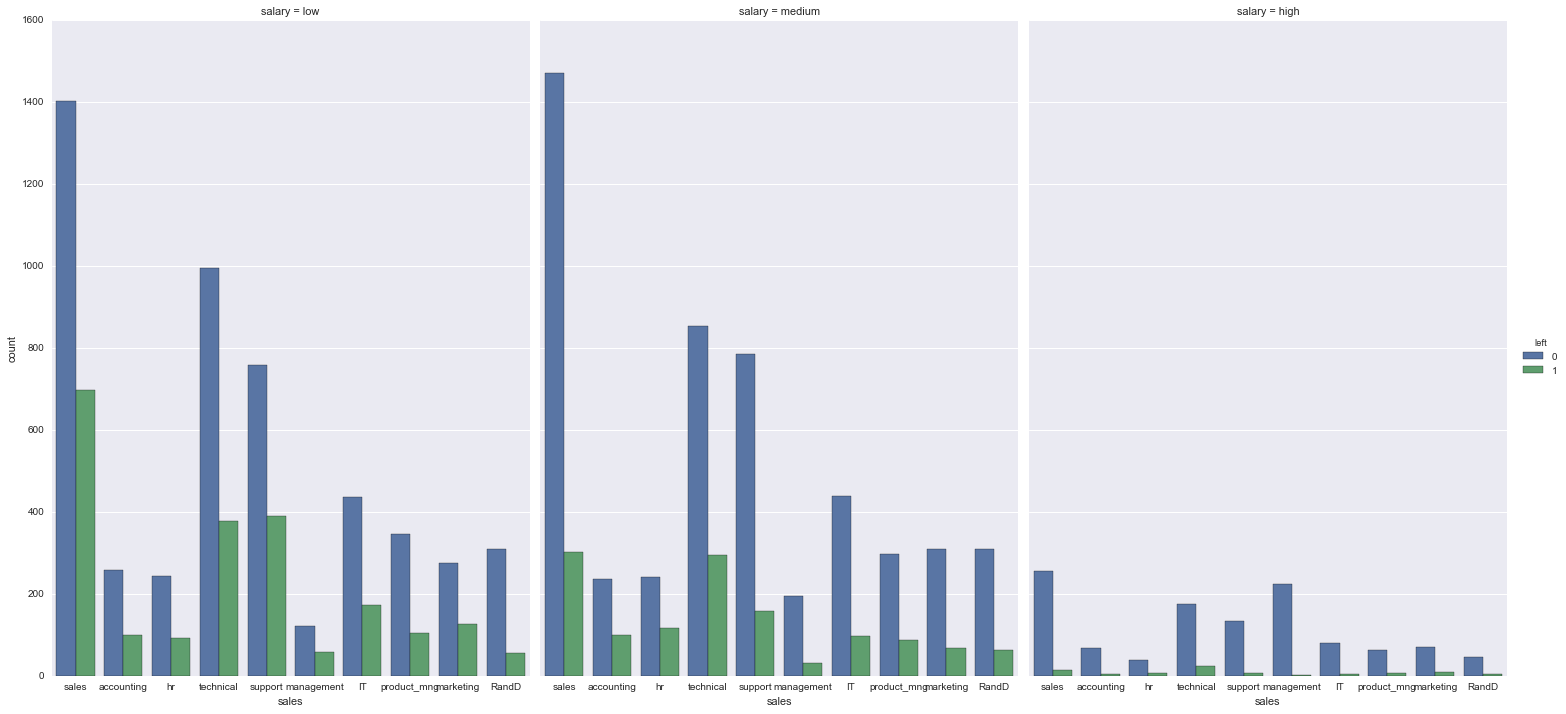

In [10]:
sns.factorplot("sales", col="salary", data=df,kind="count",size=10, aspect=.7,hue="left")

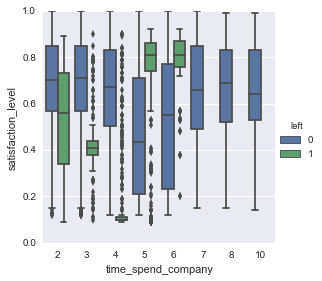

In [11]:
sns.factorplot(x='time_spend_company', y="satisfaction_level", data=df,kind="box", aspect=1,hue="left")

In [12]:
print set(df.sales)


set(['management', 'product_mng', 'hr', 'marketing', 'support', 'sales', 'RandD', 'IT', 'technical', 'accounting'])


In [13]:
#Difference in satisfaction levels by department

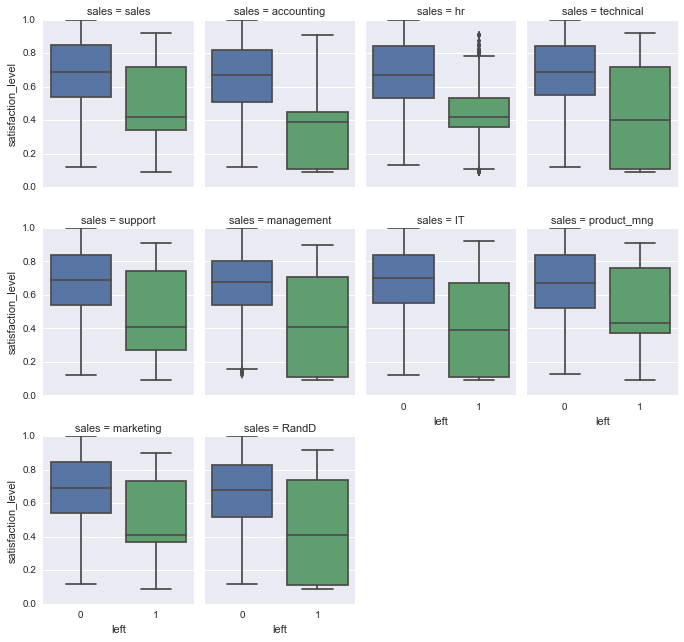

In [14]:
sns.factorplot("left","satisfaction_level",
                   data=df, kind="box", col="sales", col_wrap=4, size=3, aspect=0.8)

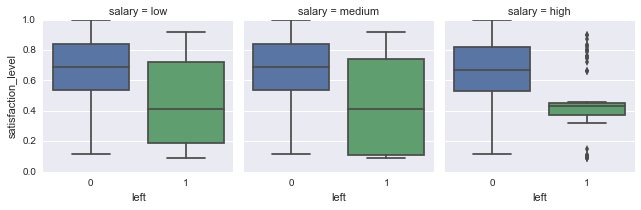

In [15]:
sns.factorplot("left","satisfaction_level",
                   data=df, kind="box", col="salary", col_wrap=3, size=3, aspect=1)

In [16]:
#Average statisfaction of employess in various departments

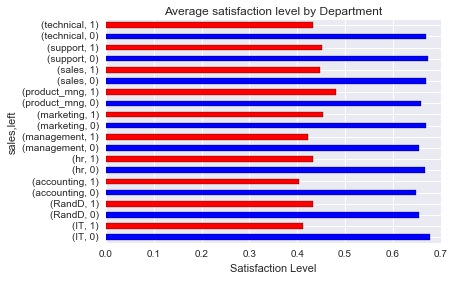

In [17]:
df.groupby(["sales", "left"])["satisfaction_level"].mean().plot(kind='barh',color=['b','r'])
plt.title("Average satisfaction level by Department")
plt.xlabel("Satisfaction Level")

What Percentage of experienced employees leave? 

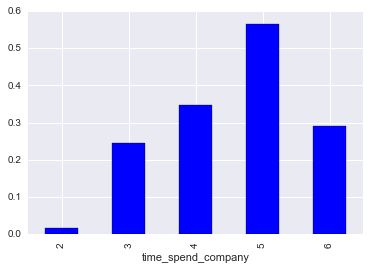

In [18]:
d = df.groupby(["time_spend_company", "left"])["satisfaction_level"].count()/df.groupby(["time_spend_company"])["satisfaction_level"].count()
d.xs(1, level='left').plot(kind='bar', color='b')

#print df.xs(10223,level='id')
#print d.xs(1, level='left')

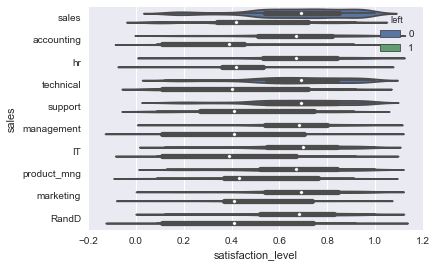

In [19]:
sns.violinplot(x="satisfaction_level", y="sales", data=df, hue = 'left', scale= "count", 
               size=10, aspect = 1,  scale_hue=False)

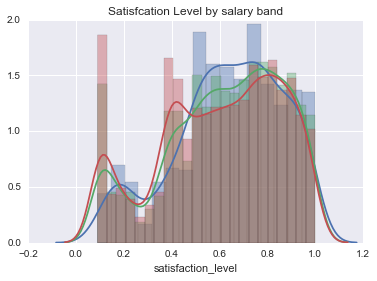

In [20]:
sns.set_color_codes()
for val in set(df["salary"]):
    x = df.loc[df["salary"] == val, "satisfaction_level"]
    ax = sns.distplot(x)
plt.title("Satisfcation Level by salary band")

In [21]:
#Let's convert categorical variables into dummies

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["sales"] = le.fit_transform(df["sales"])
df["salary"] = le.fit_transform(df["salary"])

In [23]:
sales_dummies = pd.get_dummies(df["sales"], drop_first=True, prefix="BU")
salary_dummies = pd.get_dummies(df["salary"], drop_first=True, prefix="SL")
df = pd.concat([df, sales_dummies, salary_dummies], axis=1)
df.drop(["sales","salary"], axis=1,inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Num_Project_cat,BU_1,BU_2,BU_3,BU_4,BU_5,BU_6,BU_7,BU_8,BU_9,SL_1,SL_2
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5,262,6,0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [24]:
X = pd.concat([df.ix[:,:5],  df.ix[:,7:]],axis=1)
y = df["left"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state =1)

Let's try various classification algorithms!

In [26]:
#Logistic Regression

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [30]:
conmat = np.array(confusion_matrix(y_pred, y_test))
confusion_matrix = pd.DataFrame(conmat, index = ["Act_left", "Act_Not_left"], columns = ["Pred_left", "Pred_not_left"])
confusion_matrix

,Pred_left,Pred_not_left
Act_left,2655,465
Act_Not_left,198,432


In [31]:
accuracy_score(y_test, y_pred)

0.82320000000000004

In [32]:
logreg.coef_

array([[-3.42488635,  0.80721963,  1.02793801,  0.00405465,  0.28723255,
        -1.45655936, -2.73974767, -0.49626652,  0.09539701,  0.33297793,
        -0.55054515,  0.02745624, -0.00848322,  0.06876756,  0.14934894,
         0.16442199,  1.64755938,  1.17265567]])

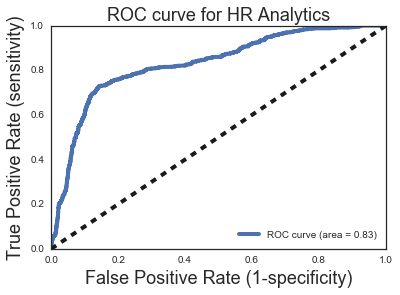

In [33]:
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn-white')

Y_score = logreg.decision_function(X_test)

# For class malignant, find the area under the curve
FPR, TPR, THR = roc_curve(y_test, Y_score)
ROC_AUC = auc(FPR, TPR)

# Plot of a ROC curve for class 1 (has_cancer)
#plt.figure(figsize=[11,9])
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1-specificity)', fontsize=18)
plt.ylabel('True Positive Rate (sensitivity)', fontsize=18)
plt.title('ROC curve for HR Analytics', fontsize=18)
plt.legend(loc="lower right")
plt.show()

As expected, logistic regression didn't perform well! Let's see, if Grid serach helps improving the model performance!

In [34]:
#Lets do a Grid Search
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
C_vals= [11,12,13,14,15,16,17,18]
penalties = ['l1','l2']

gs = GridSearchCV(logreg, {'penalty':penalties, 'C': C_vals}, verbose = True, cv = 5, scoring = 'roc_auc')
gs.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    6.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [11, 12, 13, 14, 15, 16, 17, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=True)

In [35]:
gs.best_params_

{'C': 17, 'penalty': 'l1'}

In [36]:
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return

In [37]:
from sklearn.metrics import classification_report
gs_logreg = LogisticRegression(C=gs.best_params_["C"], penalty=gs.best_params_["penalty"], solver='liblinear')
gs_logreg.fit(X_train, y_train)
Y_ = gs_logreg.predict(X_test)

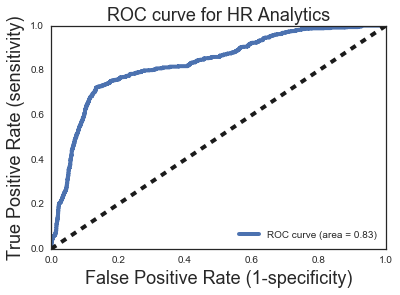

In [38]:
Y_score = gs_logreg.decision_function(X_test)

# For class malignant, find the area under the curve
FPR, TPR, THR = roc_curve(y_test, Y_score)
ROC_AUC = auc(FPR, TPR)

# Plot of a ROC curve for class 1 (has_cancer)
#plt.figure(figsize=[11,9])
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1-specificity)', fontsize=18)
plt.ylabel('True Positive Rate (sensitivity)', fontsize=18)
plt.title('ROC curve for HR Analytics', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [39]:
#Model performace hasn't been improved much!

In [40]:
#Let's try tree based classifier - RandomForest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=800,random_state=10)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.99119999999999997

In [42]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=800, n_jobs=1, oob_score=False, random_state=10,
            verbose=0, warm_start=False)

In [43]:
from sklearn.metrics import confusion_matrix
conmat = np.array(confusion_matrix(rf_pred, y_test))
confusion_matrix = pd.DataFrame(conmat, index = ["Act_left", "Act_Not_left"], columns = ["Pred_left", "Pred_not_left"])
confusion_matrix

,Pred_left,Pred_not_left
Act_left,2843,23
Act_Not_left,10,874


In [44]:
features = np.argsort(rf.feature_importances_)[::-1]
print('Feature ranking:')

for f in range(df.shape[1]-2):
    print('%d. feature %d %s (%f)' % (f+1 , features[f], df.columns[features[f]],
                                      rf.feature_importances_[features[f]]))

Feature ranking:
1. feature 0 satisfaction_level (0.291732)
2. feature 4 time_spend_company (0.170230)
3. feature 3 average_montly_hours (0.145596)
4. feature 2 number_project (0.136434)
5. feature 1 last_evaluation (0.127405)
6. feature 6 left (0.097567)
7. feature 16 BU_8 (0.007072)
8. feature 17 BU_9 (0.003672)
9. feature 15 BU_7 (0.003487)
10. feature 13 BU_5 (0.003407)
11. feature 14 BU_6 (0.002943)
12. feature 5 Work_accident (0.001832)
13. feature 10 BU_2 (0.001755)
14. feature 8 Num_Project_cat (0.001664)
15. feature 9 BU_1 (0.001488)
16. feature 7 promotion_last_5years (0.001456)
17. feature 12 BU_4 (0.001131)
18. feature 11 BU_3 (0.001129)


That's pretty good! How about Gradient Boosting and XGB?

In [45]:
# Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gbc_pred[1:10]
#y_test[1:10]

array([0, 0, 0, 1, 0, 1, 0, 0, 0])

In [47]:
accuracy_score(y_test, gbc_pred)

0.97760000000000002

In [48]:
gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [54]:
conmat = np.array(confusion_matrix(gbc_pred, y_test))
confusion_matrix = pd.DataFrame(conmat, index = ["Act_left", "Act_Not_left"], columns = ["Pred_left", "Pred_not_left"])
confusion_matrix

TypeError: 'DataFrame' object is not callable

Let's try parameter tunning

In [50]:
subsample = [0.5, 0.6, 0.7, 0.8, 0.9]

gbc_gs = GridSearchCV(gbc, {
                            'subsample':subsample}, 
                      verbose = True, cv = 5, scoring = 'accuracy')
gbc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   14.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=True)

, 'max_depth': max_depth, 'min_samples_leaf':min_samples_leaf, 
                           'n_estimators':n_estimators, 'subsample':subsample

In [51]:
gbc_gs.best_params_

{'subsample': 0.5}

In [70]:
from sklearn.metrics import classification_report
gbc_gs = GradientBoostingClassifier(learning_rate=0.1, 
                                    max_depth=6,
                                    min_samples_leaf=4,
                                    n_estimators=1000,
                                    subsample=0.5)
gbc_gs.fit(X_train, y_train)
gbc1_pred = gbc_gs.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix
conmat = np.array(confusion_matrix(gbc1_pred, y_test))
confusion_matrix = pd.DataFrame(conmat, index = ["Act_left", "Act_Not_left"], columns = ["Pred_left", "Pred_not_left"])
confusion_matrix

,Pred_left,Pred_not_left
Act_left,2839,22
Act_Not_left,14,875


In [72]:
accuracy_score(y_test, gbc1_pred)

0.99039999999999995

In [56]:
#Lets try XGB 
import xgboost as xgb

One of the requirement for XGB is to convert the data frame to DMatrix. Let's do that!'

In [57]:
dtrain = xgb.DMatrix(X_train[:].astype(float), label=y_train.astype(int)) # construct from np.array
dtest = xgb.DMatrix(X_test[:].astype(float), label=y_test.astype(int))

In [58]:
param = {'max_depth':6, 'eta':0.01, 'silent':1, 'objective':'binary:logistic', 'eval_metric': 'auc' }# specify validations set to watch performance
watchlist = [(dtest,'eval'), (dtrain,'train')]

In [59]:
num_round = 1470
clf = xgb.train(param, dtrain, num_round, watchlist,early_stopping_rounds=1200)

[0]	eval-auc:0.97532	train-auc:0.978297
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 1200 rounds.
[1]	eval-auc:0.975313	train-auc:0.978308
[2]	eval-auc:0.975315	train-auc:0.978306
[3]	eval-auc:0.975316	train-auc:0.978304
[4]	eval-auc:0.975315	train-auc:0.978302
[5]	eval-auc:0.975316	train-auc:0.978302
[6]	eval-auc:0.975312	train-auc:0.9783
[7]	eval-auc:0.975311	train-auc:0.978299
[8]	eval-auc:0.975469	train-auc:0.978494
[9]	eval-auc:0.975468	train-auc:0.978493
[10]	eval-auc:0.975552	train-auc:0.978616
[11]	eval-auc:0.975553	train-auc:0.978615
[12]	eval-auc:0.975554	train-auc:0.97861
[13]	eval-auc:0.975554	train-auc:0.978612
[14]	eval-auc:0.975588	train-auc:0.978662
[15]	eval-auc:0.975627	train-auc:0.978883
[16]	eval-auc:0.975636	train-auc:0.978872
[17]	eval-auc:0.975637	train-auc:0.978878
[18]	eval-auc:0.975631	train-auc:0.97886
[19]	eval-auc:0.975647	train-auc:0.978895
[20]	eval-auc:0.975645	train-a

In [60]:
xgb_preds = clf.predict(dtest)

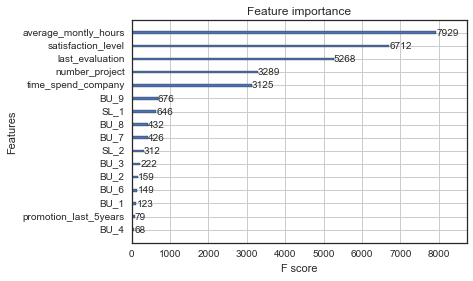

In [61]:
xgb.plot_importance(clf)

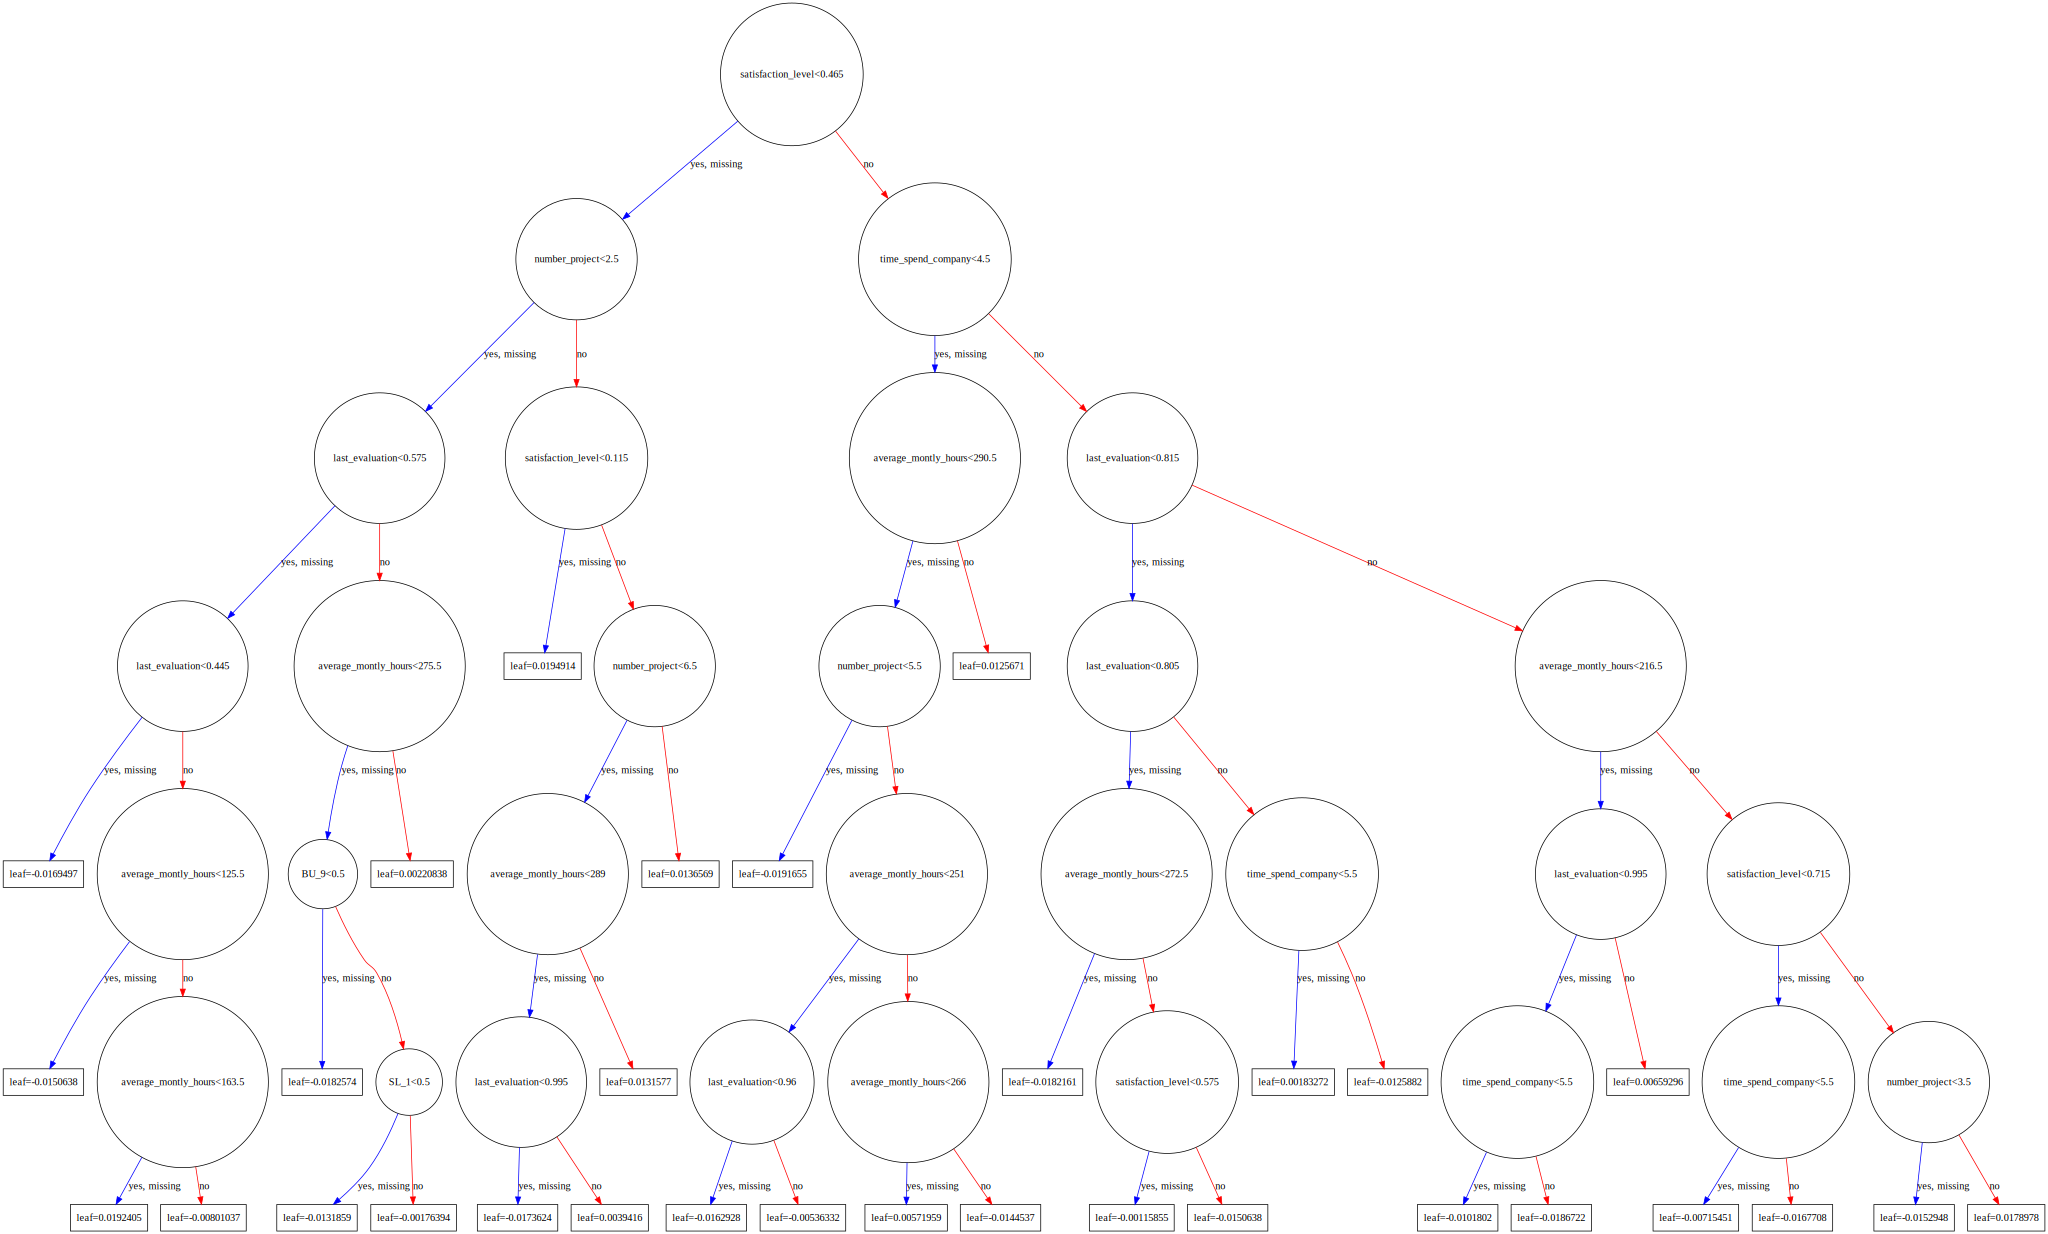

In [62]:
xgb.to_graphviz(clf, num_trees=2)

In [63]:
xgb_pred = clf.predict(dtest)

XGBClassifier from XGB does not need the df to be in dmatrix form.. :)